## Prep COVID Data to a useful format for modeling

In [2]:
import pandas as pd

In [3]:
article_metadata = pd.read_csv('../COVID_data/article_metadata/metadata.csv')

C:\Users\mitch\Anaconda3\envs\data_eng_tf\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Filter out NaNs

In [4]:
article_metadata = article_metadata[(~article_metadata['abstract'].isna()) & (~article_metadata['title'].isna())]

## Write the data in a format that will be viable for models

<AxesSubplot:>

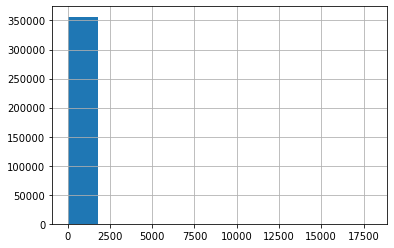

In [11]:
abstract_len = article_metadata['abstract'].apply(lambda x: len(x.split(' ')))
abstract_len.hist(bins=10)

<AxesSubplot:>

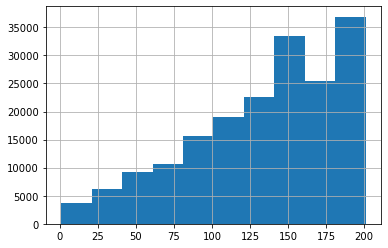

In [14]:
abstract_len[abstract_len <= abstract_len.mean()].hist()

<AxesSubplot:>

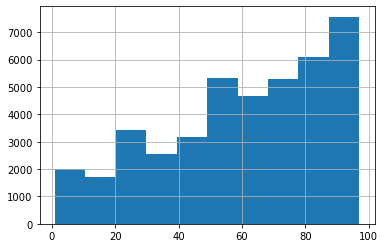

In [18]:
abstract_len[abstract_len <= (abstract_len.mean() - abstract_len.std())].hist()

In [21]:
train_format = article_metadata.apply(lambda x: f"[Title:] {x['title']} [Abstract:] {x['abstract']}", axis=1)

In [22]:
train_format.head()

0    [Title:] Clinical features of culture-proven M...
1    [Title:] Nitric oxide: a pro-inflammatory medi...
2    [Title:] Surfactant protein-D and pulmonary ho...
3    [Title:] Role of endothelin-1 in lung disease ...
4    [Title:] Gene expression in epithelial cells i...
dtype: object

In [6]:
to_csv_df = pd.DataFrame(train_format, columns=['text'])
to_csv_df.to_csv('../COVID_data/processed_data/processed_article_data/gpt_format_text.csv')

In [23]:
train_format[abstract_len <= (abstract_len.mean() - abstract_len.std())]

3         [Title:] Role of endothelin-1 in lung disease ...
7         [Title:] The 21st International Symposium on I...
42        [Title:] Bioethical Implications of Globalizat...
87        [Title:] ProCAT: a data analysis approach for ...
120       [Title:] Antibody-Based HIV-1 Vaccines: Recent...
                                ...                        
490872    [Title:] A socio-technical framework for digit...
490874    [Title:] Hepatitis E Virus–Associated Meningoe...
490885    [Title:] N95 filtering face piece respirators ...
490892    [Title:] Telehealth: “virtual” lifeline for ho...
490899    [Title:] Loss aversion fails to replicate in t...
Length: 41819, dtype: object

In [24]:
short_to_csv_df = pd.DataFrame(train_format[abstract_len <= (abstract_len.mean() - abstract_len.std())], columns=['text'])
short_to_csv_df.to_csv('../COVID_data/processed_data/processed_article_data/gpt_format_text_short.csv')

In [25]:
med_to_csv_df = pd.DataFrame(train_format[abstract_len <= (abstract_len.mean())], columns=['text'])
med_to_csv_df.to_csv('../COVID_data/processed_data/processed_article_data/gpt_format_text_med.csv')